In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
import os
import sys
module_path = os.path.abspath('../src')
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

/Users/ilya/Documents/machine_learning/kaggle_data-science-bowl-2018/code/src


In [3]:
from config import local as params
import data

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
X_train, Y_train = data.make_train_df(params)

Find 670 train_ids


In [5]:
X_test = data.make_test_df(params)

Find 65 test_ids


In [9]:
xtr, xval, ytr, yval = train_test_split(X_train, Y_train)

In [26]:
from random import sample
sample([data.read_image(x) for x in X_train[:5]], 5)

[array([[[13, 13, 13],
         [13, 13, 13],
         [13, 13, 13],
         ...,
         [12, 12, 12],
         [13, 13, 13],
         [13, 13, 13]],
 
        [[13, 13, 13],
         [12, 12, 12],
         [11, 11, 11],
         ...,
         [12, 12, 12],
         [13, 13, 13],
         [12, 12, 12]],
 
        [[13, 13, 13],
         [11, 11, 11],
         [13, 13, 13],
         ...,
         [13, 13, 13],
         [13, 13, 13],
         [13, 13, 13]],
 
        ...,
 
        [[14, 14, 14],
         [14, 14, 14],
         [13, 13, 13],
         ...,
         [13, 13, 13],
         [12, 12, 12],
         [14, 14, 14]],
 
        [[13, 13, 13],
         [13, 13, 13],
         [13, 13, 13],
         ...,
         [13, 13, 13],
         [13, 13, 13],
         [13, 13, 13]],
 
        [[13, 13, 13],
         [13, 13, 13],
         [14, 14, 14],
         ...,
         [13, 13, 13],
         [14, 14, 14],
         [14, 14, 14]]], dtype=uint8), array([[[30, 30, 30],
         [20, 20, 20

In [8]:
shapes = [data.read_image(x).shape for x in X_test]

In [9]:
resolutions = pd.DataFrame(shapes, columns=['x', 'y', 'ch'])
resolutions.head()

,x,y,ch
0,256,256,3
1,512,680,3
2,512,640,3
3,520,696,3
4,512,680,3


In [8]:
resolutions.groupby(by=['x', 'y']).count().sort_values('ch', ascending=False)

ch
x    y        
256  256   334
     320   112
520  696    92
360  360    91
1024 1024   16
512  640    13
603  1272    6
260  347     5
1040 1388    1

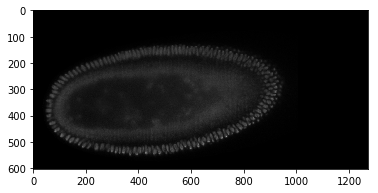

In [28]:
plt.imshow(data.read_image(X_train[i])[:,:,:3])

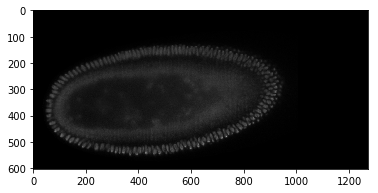

In [24]:
i = resolutions[resolutions['x'] == 603].index[0]
plt.imshow(data.read_image(X_train[i]))